<div
     style="padding: 20px;
            color: white;
            font-size: 250%;
            text-align: center;
            display: fill;
            border-radius: 5px;
            background-color: #023c66;
            overflow: hidden;
            font-weight: 700;
            border: 5px solid #F28C28;"
     >
    Module 4 - Evaluating Model Performance for Regression Problems
</div>

<div style="color:white;display:fill;
            background-color:#3bb2d6;font-size:200%;">
    <p style="padding: 4px;color:white;"><b>Topics Covered</b></p>
</div>


* We have three types of predictive models (1) regression (2) classification and (3) propensity or ranking.(Section 5.1)
* Various prediction accuracy measures to compare models that have a continuous target model type (1). (Section 5.2)




<div style="color:white;display:fill;
            background-color:#3bb2d6;font-size:200%;">
    <p style="padding: 4px;color:white;"><b>Types of Models</b></p>
</div>


1.   **Regression-based models**
2.   **Classification-based models**
3.   **Propensity-based models**

We will focus here on measuring the performance in regression-based problems.


<div style="color:white;display:fill;
            background-color:#3bb2d6;font-size:200%;">
    <p style="padding: 4px;color:white;"><b>Evaluating Performance for Regression Problems</b></p>
</div>

We will use the data `“used_cars_sales.csv”` in this section. The goal of the analysis to is accurately predict the selling price (`sellingprice`) of different cars.

<div style="color:white;display:fill;
            background-color:#3bb2d6;font-size:200%;">
    <p style="padding: 4px;color:white;"><b>The benchmark prediction</b></p>
</div>

If you could **NOT** build a model, the best guess (prediction) for a regression-based problem is just the average value of $y$, namely $\bar{y}$. A good predictive model should outperform the benchmark.

<div style="color:white;display:fill;
            background-color:#3bb2d6;font-size:200%;">
    <p style="padding: 4px;color:white;"><b>The Residual Error</b></p>
</div>

We define a good predictive model as one that has a prediction $\hat{y}_i$ that is close to the actual value, $y_i$.

We measure this difference with a residual $$e_i=y_i−\hat{y}_i$$

A residual smaller in magnitude is better.

There are many different ways of quantifying the average prediction performance over a set of data.

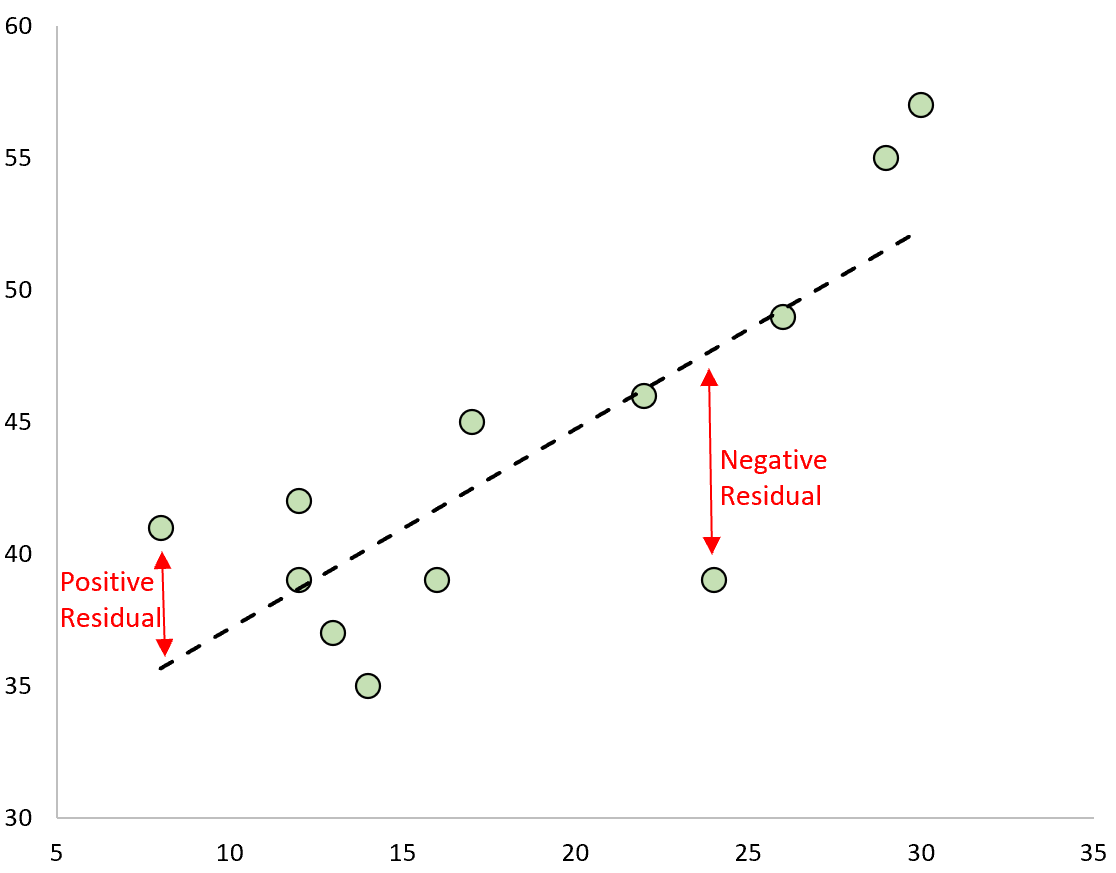

In [1]:
## formatting code
def style_negative(v, props=''):
    return props if v < 0 else None

In [2]:
# Example
# suppose we have the following true values of y
y_true = [23.5, 45.1, 34.7, 29.8, 48.3, 56.4, 21.2, 33.5, 39.8, 41.6,
          27.4, 36.7, 45.9, 50.3, 31.6, 28.9, 42.7, 37.8, 34.1, 29.5]

# a regression-based model predicts the following
# y_pred can be the result of ANY model (XGBoost, LR, NN)
y_pred = [25.7, 43.0, 35.5, 30.1, 49.8, 54.2, 22.5, 34.2, 38.9, 42.4,
          26.3, 37.6, 46.7, 51.1, 33.5, 27.7, 43.2, 36.9, 33.4, 31.0]


# let's put this together in a data frame
import pandas as pd
df = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})

# the residual-error is the difference between the actual and the predicted
df['error'] = df['y_true'] - df['y_pred']

df.style.map(style_negative, props='color:red;')

,y_true,y_pred,error
0,23.500000,25.700000,-2.200000
1,45.100000,43.000000,2.100000
2,34.700000,35.500000,-0.800000
3,29.800000,30.100000,-0.300000
4,48.300000,49.800000,-1.500000
5,56.400000,54.200000,2.200000
6,21.200000,22.500000,-1.300000
7,33.500000,34.200000,-0.700000
8,39.800000,38.900000,0.900000
9,41.600000,42.400000,-0.800000


In [3]:
## for LR sum(residuals) = 0 (constrained)
## for non-linear sum(residuals) is NOT constrained (measure of bias + or -)
df['error'].sum()

-4.900000000000009

## **MEAN SQUARED ERROR**

Regression metric (lower the better).

* adv: most common metric
* disadv: the units are squared values of y (e.g., salary^2, units^2)
* disadv: very affected by outlier, anomalies.

In [6]:
## NUMPY
import numpy as np

## Need vector y_true, and vector y_pred
y_true = np.array([23.5, 45.1, 34.7, 29.8])
y_pred = np.array([25.7, 43  , 35.5, 30.1])
y_pred1 = np.array([23.5, 45.1  , 34.7, 100.1])



## MSE
print(np.mean((y_true - y_pred)**2))
print(np.mean((y_true - y_pred1)**2))

2.4949999999999997
1235.5224999999998


In [7]:
## QUIZ EXAMPLE
y_true = np.array([22.3, 47.2, 31.6, 28.5])
y_pred = np.array([24.1, 44.9  , 33.2, 27.8])

print(np.mean((y_true - y_pred)**2))

2.8950000000000062


In [9]:
## sklearn has a metrics module
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true, y_pred)

2.8950000000000062

## **Root Mean Squared Error (RMSE)**

* adv: same units of y. You can interpret as the estimated error of the model.
* disadv: same as MSE

In [10]:
## QUIZ EXAMPLE
y_true = np.array([22.3, 47.2, 31.6, 28.5])
y_pred = np.array([24.1, 44.9  , 33.2, 27.8])

## RMSE
MSE = np.mean((y_true - y_pred)**2)
RMSE = np.sqrt(MSE)
RMSE

1.7014699527173573

In [11]:
## sklearn - root_mean_squared_error
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_true, y_pred)

1.7014699527173573

In [12]:
## prior versions of sklearn
mean_squared_error(y_true, y_pred, squared = False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.7014699527173573

## **MEAN ABSOLUTE ERROR (MAE)**

* adv: same units of y. You can interpret it as estimated error
* adv: more resistant to outliers, but using the mean always causes issues
* disadv: not as used.

In [14]:
## QUIZ EXAMPLE
y_true = np.array([22.3, 47.2, 31.6, 28.5])
y_pred = np.array([24.1, 44.9  , 33.2, 27.8])

## MAE
np.mean(np.abs((y_true - y_pred)))

1.6000000000000014

In [16]:
## sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

mean_absolute_error(y_true, y_pred)

1.6000000000000014

## **Mean Absolute Percentage Error (MAPE)**

* adv: it is a percentage error
* adv: more resistant to outliers (just as MAE)

In [17]:
## QUIZ EXAMPLE
y_true = np.array([22.3, 47.2, 31.6, 28.5])
y_pred = np.array([24.1, 44.9  , 33.2, 27.8])

## MAPE
np.mean(np.abs((y_true - y_pred)) / y_true)

0.0511601543124342

In [20]:
## BENCHMARK
## predicting with average of y (ybar)
y_true = np.array([22.3, 47.2, 31.6, 28.5])
y_pred = np.mean(y_true)

## MSE
np.mean((y_true - y_pred)**2)

84.22500000000001

In [21]:
## In linear models it is NOT possible to do worse than the benchmark
## In non-linear models the model can predict worse than the benchmark
## negative R2 is possible

<div style="color:white;display:fill;
            background-color:#3bb2d6;font-size:200%;">
    <p style="padding: 4px;color:white;"><b>The Mean Absolute Error (MAE)</b></p>
</div>

Measures the average **absolute** errors:


$$\text{MAE} = \frac{\sum_{i = 1}^n |y_i - \hat{y}_i|}{n}$$

sklearn has a function to compute the MAE.

In [ ]:
# the residual-error is the difference between the actual and the predicted
## we get the absolute value of the errors
df['abs_error'] = df['error'].abs()
df.style.map(style_negative, props='color:red;')

,y_true,y_pred,error,abs_error
0,23.500000,25.700000,-2.200000,2.200000
1,45.100000,43.000000,2.100000,2.100000
2,34.700000,35.500000,-0.800000,0.800000
3,29.800000,30.100000,-0.300000,0.300000
4,48.300000,49.800000,-1.500000,1.500000
5,56.400000,54.200000,2.200000,2.200000
6,21.200000,22.500000,-1.300000,1.300000
7,33.500000,34.200000,-0.700000,0.700000
8,39.800000,38.900000,0.900000,0.900000
9,41.600000,42.400000,-0.800000,0.800000


In [ ]:
## the mean absolute error
df['abs_error'].mean()

1.1549999999999998

Using the sklearn implementation:

`mean_absolute_error(y_true, y_test)`

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df['y_true'], df['y_pred'])

1.1549999999999998

<div style="color:white;display:fill;
            background-color:#3bb2d6;font-size:200%;">
    <p style="padding: 4px;color:white;"><b>The Mean Squared Error (MSE)</b></p>
</div>


Measures the average **squared** errors:

$$\text{MSE} = \frac{\sum_{i = 1}^n (y_i - \hat{y}_i)^2}{n}$$

sklearn has a function to compute the MSE.

In [ ]:
# the residual-error is the difference between the actual and the predicted
## we get the absolute value of the errors
df['squared_error'] = df['error']**2
df.style.map(style_negative, props='color:red;')

,y_true,y_pred,error,abs_error,squared_error
0,23.500000,25.700000,-2.200000,2.200000,4.840000
1,45.100000,43.000000,2.100000,2.100000,4.410000
2,34.700000,35.500000,-0.800000,0.800000,0.640000
3,29.800000,30.100000,-0.300000,0.300000,0.090000
4,48.300000,49.800000,-1.500000,1.500000,2.250000
5,56.400000,54.200000,2.200000,2.200000,4.840000
6,21.200000,22.500000,-1.300000,1.300000,1.690000
7,33.500000,34.200000,-0.700000,0.700000,0.490000
8,39.800000,38.900000,0.900000,0.900000,0.810000
9,41.600000,42.400000,-0.800000,0.800000,0.640000


In [ ]:
## the mean squared error
df['squared_error'].mean()

1.642499999999999

Using the sklearn implementation:

`mean_squared_error(y_true, y_test)`

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df['y_true'], df['y_pred'])

1.642499999999999

<div style="color:white;display:fill;
            background-color:#3bb2d6;font-size:200%;">
    <p style="padding: 4px;color:white;"><b>The Root Mean Squared Error (RMSE)</b></p>
</div>


Measures the average **square root** of the squared errors so that we have the units of the problem:

$$\text{RMSE} = \sqrt{\frac{\sum_{i = 1}^n (y_i - \hat{y}_i)^2}{n}}$$

sklearn uses the same MSE function to compute RMSE. However, you need to specify `squared = False`. The `root_mean_squared_error` function was recently added to sklearn.

In [ ]:
## the root mean squared error
import numpy as np
np.sqrt(df['squared_error'].mean())

1.2816005617976294

Using sklearn's implementation:

`root_mean_squared_error(y_true, y_test)`

In [ ]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(df['y_true'], df['y_pred'])

1.2816005617976294

<div style="color:white;display:fill;
            background-color:#3bb2d6;font-size:200%;">
    <p style="padding: 4px;color:white;"><b>The Mean Absolute Percentage Error (MAPE)</b></p>
</div>

Measures the average **absolute percentage** errors:

$$\text{MAPE} = \frac{\sum_{i = 1}^n |y_i - \hat{y}_i| / y_i}{n}$$

sklearn has a function to compute the MAPE.


In [ ]:
# the residual-error is the difference between the actual and the predicted
## we get the absolute value of the errors
df['absolute_pct_error'] = df['abs_error']/df['y_true']
df.style.map(style_negative, props='color:red;')

,y_true,y_pred,error,abs_error,squared_error,absolute_pct_error
0,23.500000,25.700000,-2.200000,2.200000,4.840000,0.093617
1,45.100000,43.000000,2.100000,2.100000,4.410000,0.046563
2,34.700000,35.500000,-0.800000,0.800000,0.640000,0.023055
3,29.800000,30.100000,-0.300000,0.300000,0.090000,0.010067
4,48.300000,49.800000,-1.500000,1.500000,2.250000,0.031056
5,56.400000,54.200000,2.200000,2.200000,4.840000,0.039007
6,21.200000,22.500000,-1.300000,1.300000,1.690000,0.061321
7,33.500000,34.200000,-0.700000,0.700000,0.490000,0.020896
8,39.800000,38.900000,0.900000,0.900000,0.810000,0.022613
9,41.600000,42.400000,-0.800000,0.800000,0.640000,0.019231


In [ ]:
## the mean absolute percentage error can be shown as a fraction
df['absolute_pct_error'].mean()

0.03369858083025283

In [ ]:
## the mean absolute percentage error can be shown as a percentage
df['absolute_pct_error'].mean()*100

3.369858083025283

Using sklearn's implementation:

`mean_absolute_percentage_error(y_true, y_test)`

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(df['y_true'], df['y_pred'])

0.03369858083025283

All of these measures are influenced by outliers. To determine if this is a problem:

* Plot a histogram of the residuals for both the training and validation data and see if there are any large outliers.

* Compute median based measure (like the median absolute error.)

We compute these measures on **both** the training and validation data sets. Comparison of the measure on the training and validation set can give some indication of **overfitting** if there is a significant difference.

<div style="color:white;display:fill;
            background-color:#3bb2d6;font-size:200%;">
    <p style="padding: 4px;color:white;"><b>Predicting the Selling Price of Cars</b></p>
</div>

Let's check the variables and variable types:





In [22]:
# Let's import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/used_cars_sales.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2004,Saturn,ION,3,Coupe,manual,1g8av12fx4z104018,ca,3.8,108926.0,red,gray,south bay hyundai,1575,1550,Tue May 26 2015 05:30:00 GMT-0700 (PDT)
1,2011,Honda,CR-Z,EX,Hatchback,automatic,jhmzf1d61bs007359,ca,4.9,34475.0,gray,gray,"ahfc/honda lease trust/hvt, inc. eot",10200,11500,Tue Dec 30 2014 15:00:00 GMT-0800 (PST)
2,2012,GMC,Sierra 1500,SLE,Crew Cab,automatic,3gtp1ve04cg187423,ca,3.5,57124.0,gray,black,reliance motors llc,22500,24250,Thu Feb 19 2015 04:00:00 GMT-0800 (PST)
3,2002,Infiniti,I35,Base,Sedan,automatic,jnkda31a52t019330,ma,2.3,249573.0,green,gray,imperial chevrolet,1425,950,Tue Feb 17 2015 02:00:00 GMT-0800 (PST)
4,2005,Chevrolet,Malibu,Base,Sedan,automatic,1g1zs52fx5f309343,ma,3.2,88693.0,black,gray,clay nissan of newton inc,3225,2500,Tue Jan 06 2015 02:00:00 GMT-0800 (PST)


Let's remove the variable `saledate` and `seller`, `vin`. Think about why.




In [23]:
df.drop(['saledate', 'seller', 'vin'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          125000 non-null  int64  
 1   make          122708 non-null  object 
 2   model         122683 non-null  object 
 3   trim          122628 non-null  object 
 4   body          122037 non-null  object 
 5   transmission  110236 non-null  object 
 6   state         125000 non-null  object 
 7   condition     122396 non-null  float64
 8   odometer      124979 non-null  float64
 9   color         124832 non-null  object 
 10  interior      124832 non-null  object 
 11  mmr           125000 non-null  int64  
 12  sellingprice  125000 non-null  int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 12.4+ MB


### **Missing Values**

Let's check for missing values:

In [24]:
missing_values = df.isna().sum() / len(df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True, ascending = False)
missing_values

,0
transmission,0.118112
body,0.023704
condition,0.020832
trim,0.018976
model,0.018536
make,0.018336
color,0.001344
interior,0.001344
odometer,0.000168


#### **Imputation of Categorical Variables**

In [25]:
for variable in missing_values.index:
  if df[variable].dtype == 'object':
    print(variable)

transmission
body
trim
model
make
color
interior


In [26]:
df.transmission.value_counts()

,count
transmission,
automatic,106200
manual,4036


In [27]:
## let's impute transmission with "automatic"
df['transmission'].fillna('automatic', inplace = True)

In [28]:
## let's impute body with unknown
df['body'].fillna('unknown', inplace = True)

In [29]:
## let's impute trim with unknown
df['trim'].fillna('unknown', inplace = True)

In [30]:
## let's impute model with unknown
df['model'].fillna('unknown', inplace = True)

In [31]:
## let's impute with unknown
df['make'].fillna('unknown', inplace = True)

In [32]:
## let's impute with unknown
df['color'].fillna('unknown', inplace = True)

In [33]:
## let's impute interior with unknown
df['interior'].fillna('unknown', inplace = True)

#### **Imputation of Numeric Variables**

In [ ]:
## impute condition with the median
df['condition'].fillna(df['condition'].median(), inplace = True)

In [ ]:
## impute odometer using KNNImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['odometer', 'year']] = imputer.fit_transform(df[['odometer', 'year']])

In [ ]:
## check if there is any other missing value
missing_values = df.isna().sum() / len(df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True, ascending = False)
missing_values

,0


#### **Check for Unusual Observations**

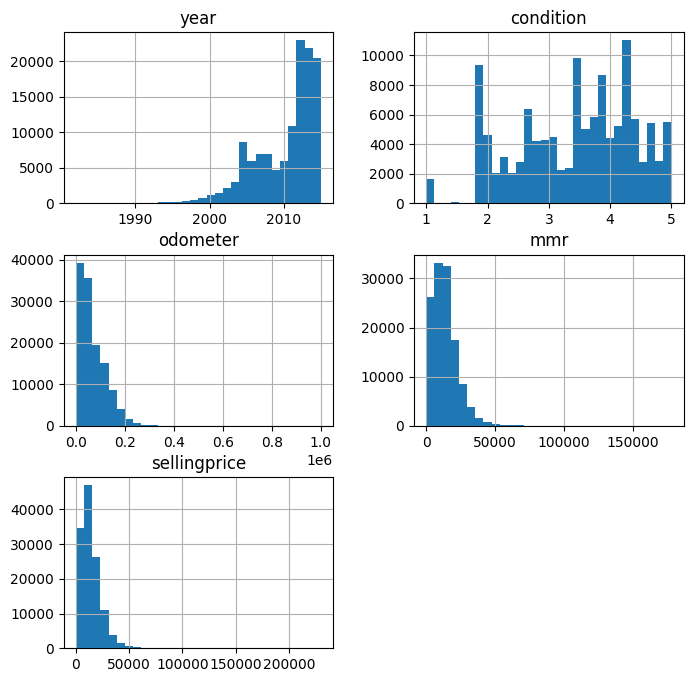

In [34]:
df.hist(figsize = (8, 8), bins = 30);

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,125000.0,2010.044856,3.972783,1982.0,2007.0,2012.0,2013.0,2015.0
condition,122396.0,3.429351,0.948334,1.0,2.7,3.6,4.2,5.0
odometer,124979.0,68176.869042,53290.720454,1.0,28202.5,52135.0,98980.5,999999.0
mmr,125000.0,13801.392200,9710.382220,25.0,7125.0,12300.0,18350.0,178000.0
sellingprice,125000.0,13645.530616,9799.540070,1.0,6900.0,12200.0,18200.0,230000.0


In [36]:
## let's check the top odometers
df['odometer'].sort_values(ascending = False).head(30)

,odometer
28790,999999.0
77608,999999.0
88298,999999.0
104672,999999.0
61317,999999.0
111131,999999.0
106021,999999.0
67877,999999.0
105332,999999.0
57980,999999.0


In [37]:
## let's drop cars with odometers more than 500k
df = df[df['odometer'] < 500000]

#### **Dimension Reduction**

In [38]:
## check for the number of levels for categorical variables
for i in df.select_dtypes('O'):
    print(f'Var {i} has unique values is {df[i].nunique()}')

Var make has unique values is 87
Var model has unique values is 845
Var trim has unique values is 1529
Var body has unique values is 81
Var transmission has unique values is 2
Var state has unique values is 38
Var color has unique values is 21
Var interior has unique values is 18


In [39]:
## let's create a new car age variable
# Define the conditions
conditions = [
    (df['year'] <= 2001),
    (df['year'] > 2001) & (df['year'] <= 2006),
    (df['year'] > 2006) & (df['year'] <= 2010),
    (df['year'] > 2010)
]

# Define the corresponding values
choices = ['older than 15 years', '10 to 15 years', '5 to 10 years', 'less than 5 years']

# Use np.select to map the conditions to new values
df['carage'] = np.select(conditions, choices, default='unknown')
df.drop('year', inplace = True, axis = 1)

In [ ]:
df[['carage']].value_counts()

,count
carage,
less than 5 years,76033
5 to 10 years,24466
10 to 15 years,19716
older than 15 years,4769


In [ ]:
## let's drop trim b/c of excessive number of levels
df.drop(['trim'], axis = 1, inplace = True)

In [ ]:
## let's drop model b/c of excessive number of levels
df.drop(['model'], axis = 1, inplace = True)

In [ ]:
## reducing dims for make
## let's create a copy of the data set with only the RESPONSE and the variable(s) to reduce dims
## let's also ONE-HOT encode
df_copy = df.copy()[['sellingprice', 'make']]
df_copy = pd.get_dummies(df_copy)
df_copy = df_copy.sample(10000, random_state = 591)
df_copy.head()

,sellingprice,make_Acura,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,make_Chevrolet,make_Chrysler,...,make_plymouth,make_pontiac,make_porsche,make_smart,make_subaru,make_suzuki,make_toyota,make_unknown,make_volkswagen,make_vw
8765,40250,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
123700,7300,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
109455,16500,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
55957,1800,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
66065,3100,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
## next import the random forest
from sklearn.ensemble import RandomForestRegressor

## we fit the random forest
rf = RandomForestRegressor()
rf.fit(df_copy.drop('sellingprice', axis = 1), df_copy['sellingprice'])

feature_importances = pd.DataFrame({'Variable' :df_copy.drop('sellingprice', axis = 1).columns, 'Importance': rf.feature_importances_})
feature_importances.set_index('Variable', inplace = True)
feature_importances = feature_importances.sort_values(by = 'Importance', ascending = False)
feature_importances[:10]

,Importance
Variable,
make_BMW,0.121632
make_Mercedes-Benz,0.114709
make_Rolls-Royce,0.110216
make_Infiniti,0.081221
make_Ram,0.077772
make_Porsche,0.070567
make_Lexus,0.056587
make_Ford,0.055169
make_Audi,0.046091


2.   Get dummy-encoded variables.

In [ ]:
## let's keep top 5 makes in terms of importance
df['make_BMW'] = (df["make"] == 'BMW').astype('int')
df['make_Mercedes-Benz'] = (df["make"] == 'Mercedes-Benz').astype('int')
df['make_Rolls-Royce'] = (df["make"] == 'Rolls-Royce').astype('int')
df['make_Infiniti'] = (df["make"] == 'Infiniti').astype('int')
df['make_Ram'] = (df["make"] == 'Ram').astype('int')

df.drop(['make'], inplace = True, axis = 1)

In [ ]:
## reducing dims for body
## let's create a copy of the data set with only the RESPONSE and the variable(s) to reduce dims
## let's also ONE-HOT encode
df_copy = df.copy()[['sellingprice', 'body']]
df_copy = pd.get_dummies(df_copy)
df_copy = df_copy.sample(10000, random_state = 591)
df_copy.head()

,sellingprice,body_Access Cab,body_Beetle Convertible,body_CTS Coupe,body_CTS Wagon,body_CTS-V Coupe,body_Cab Plus,body_Cab Plus 4,body_Club Cab,body_Convertible,...,body_sedan,body_supercab,body_supercrew,body_suv,body_transit van,body_tsx sport wagon,body_unknown,body_van,body_wagon,body_xtracab
8765,40250,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
123700,7300,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
109455,16500,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
55957,1800,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
66065,3100,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
## next import the random forest
from sklearn.ensemble import RandomForestRegressor

## we fit the random forest
rf = RandomForestRegressor()
rf.fit(df_copy.drop('sellingprice', axis = 1), df_copy['sellingprice'])

feature_importances = pd.DataFrame({'Variable' :df_copy.drop('sellingprice', axis = 1).columns, 'Importance': rf.feature_importances_})
feature_importances.set_index('Variable', inplace = True)
feature_importances = feature_importances.sort_values(by = 'Importance', ascending = False)
feature_importances[:10]

,Importance
Variable,
body_Sedan,0.217691
body_Crew Cab,0.113674
body_unknown,0.084318
body_SuperCrew,0.077315
body_Hatchback,0.069815
body_crew cab,0.043610
body_Minivan,0.037428
body_sedan,0.034940
body_Wagon,0.034080


In [ ]:
## let's keep top 5 body types in terms of importance
df['body_Sedan'] = (df["body"] == 'Sedan').astype('int')
df['body_Crew Cab'] = (df["body"] == 'Crew Cab').astype('int')
df['body_unknown'] = (df["body"] == 'unknown').astype('int')
df['body_SuperCrew'] = (df["body"] == 'SuperCrew').astype('int')
df['body_Hatchback'] = (df["body"] == 'Hatchback').astype('int')

df.drop(['body'], inplace = True, axis = 1)

In [ ]:
## reducing dims for state
## let's create a copy of the data set with only the RESPONSE and the variable(s) to reduce dims
## let's also ONE-HOT encode
df_copy = df.copy()[['sellingprice', 'state']]
df_copy = pd.get_dummies(df_copy)
df_copy = df_copy.sample(10000, random_state = 591)
df_copy.head()

,sellingprice,state_ab,state_al,state_az,state_ca,state_co,state_fl,state_ga,state_hi,state_il,...,state_pa,state_pr,state_qc,state_sc,state_tn,state_tx,state_ut,state_va,state_wa,state_wi
8765,40250,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
123700,7300,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
109455,16500,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
55957,1800,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
66065,3100,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
## next import the random forest
from sklearn.ensemble import RandomForestRegressor

## we fit the random forest
rf = RandomForestRegressor()
rf.fit(df_copy.drop('sellingprice', axis = 1), df_copy['sellingprice'])

feature_importances = pd.DataFrame({'Variable' :df_copy.drop('sellingprice', axis = 1).columns, 'Importance': rf.feature_importances_})
feature_importances.set_index('Variable', inplace = True)
feature_importances = feature_importances.sort_values(by = 'Importance', ascending = False)
feature_importances[:10]

,Importance
Variable,
state_nc,0.179646
state_md,0.150883
state_tn,0.122995
state_va,0.117622
state_ma,0.112025
state_pa,0.053290
state_on,0.036307
state_pr,0.028573
state_ca,0.020731


In [ ]:
## let's keep top 5 states (nc, md, tn, va, ma) based on importance
df['state_nc'] = (df["state"] == 'nc').astype('int')
df['state_md'] = (df["state"] == 'md').astype('int')
df['state_tn'] = (df["state"] == 'tn').astype('int')
df['state_va'] = (df["state"] == 'va').astype('int')
df['state_ma'] = (df["state"] == 'ma').astype('int')

df.drop(['state'], inplace = True, axis = 1)

#### **Encoding**

In [ ]:
## let's create dummy variables
df = pd.get_dummies(df, drop_first = True)
df.head()

,condition,odometer,mmr,sellingprice,make_BMW,make_Mercedes-Benz,make_Rolls-Royce,make_Infiniti,make_Ram,body_Sedan,...,interior_red,interior_silver,interior_tan,interior_unknown,interior_white,interior_yellow,interior_—,carage_5 to 10 years,carage_less than 5 years,carage_older than 15 years
0,3.8,108926.0,1575,1550,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,4.9,34475.0,10200,11500,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,3.5,57124.0,22500,24250,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,2.3,249573.0,1425,950,0,0,0,1,0,1,...,False,False,False,False,False,False,False,False,False,False
4,3.2,88693.0,3225,2500,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124984 entries, 0 to 124999
Data columns (total 60 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   condition                   124984 non-null  float64
 1   odometer                    124984 non-null  float64
 2   mmr                         124984 non-null  int64  
 3   sellingprice                124984 non-null  int64  
 4   make_BMW                    124984 non-null  int64  
 5   make_Mercedes-Benz          124984 non-null  int64  
 6   make_Rolls-Royce            124984 non-null  int64  
 7   make_Infiniti               124984 non-null  int64  
 8   make_Ram                    124984 non-null  int64  
 9   body_Sedan                  124984 non-null  int64  
 10  body_Crew Cab               124984 non-null  int64  
 11  body_unknown                124984 non-null  int64  
 12  body_SuperCrew              124984 non-null  int64  
 13  body_Hatchback     

#### **Let's check associations**

In [ ]:
## let's use sweetviz
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 43.9 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


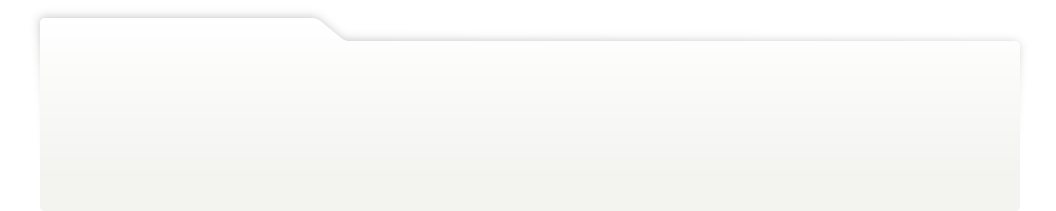
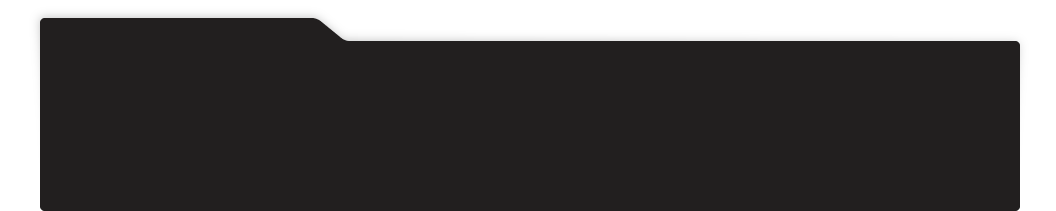
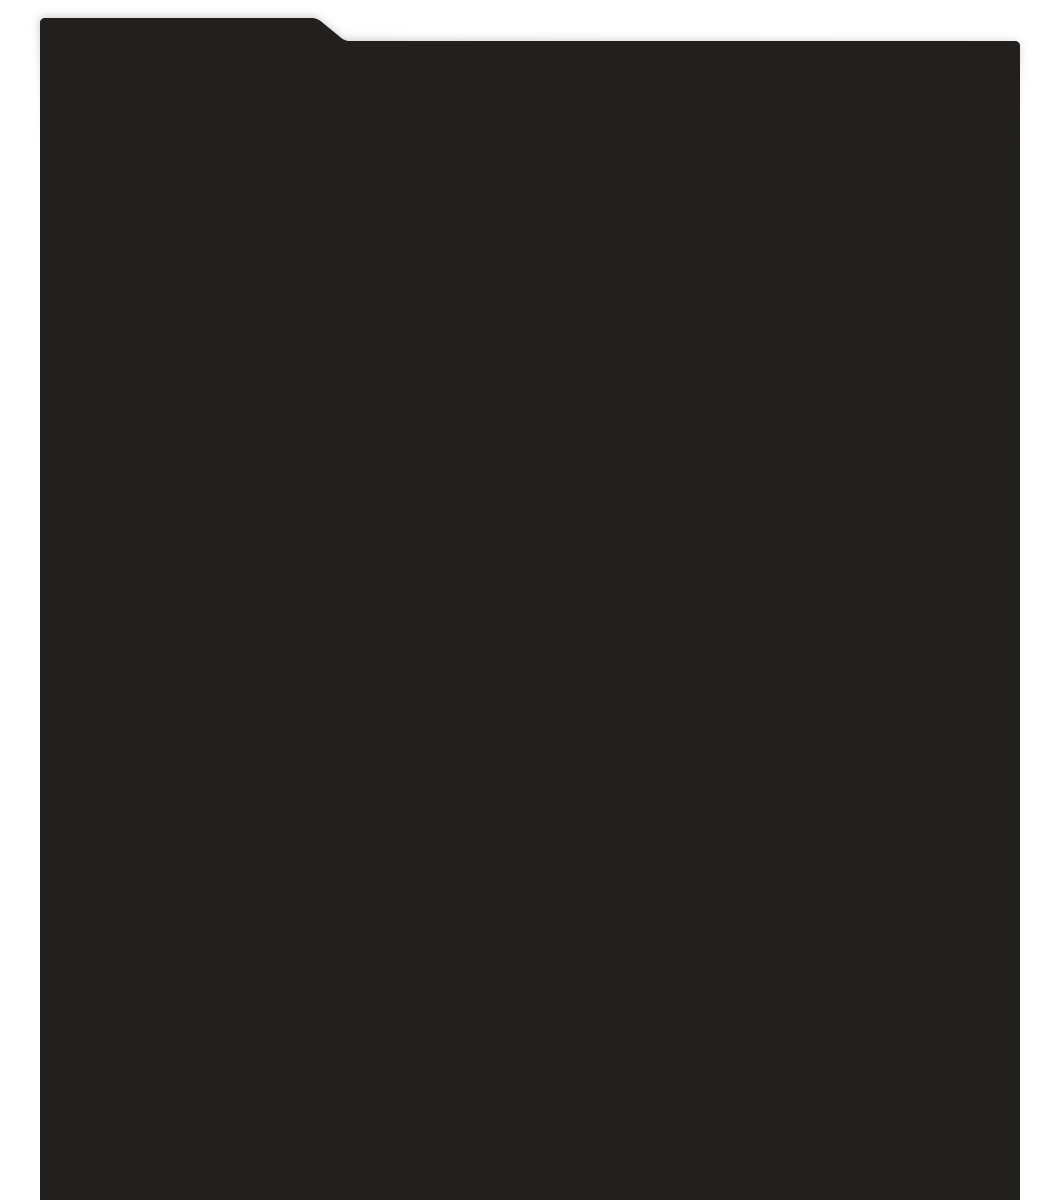
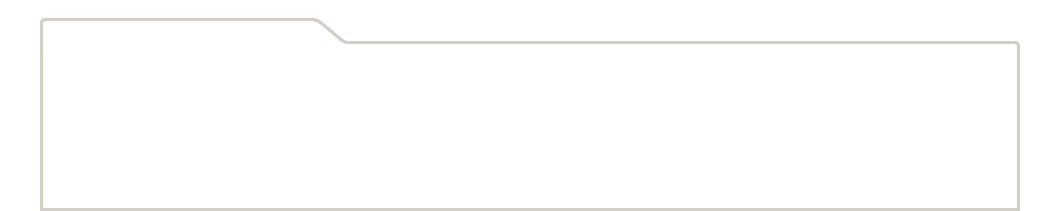
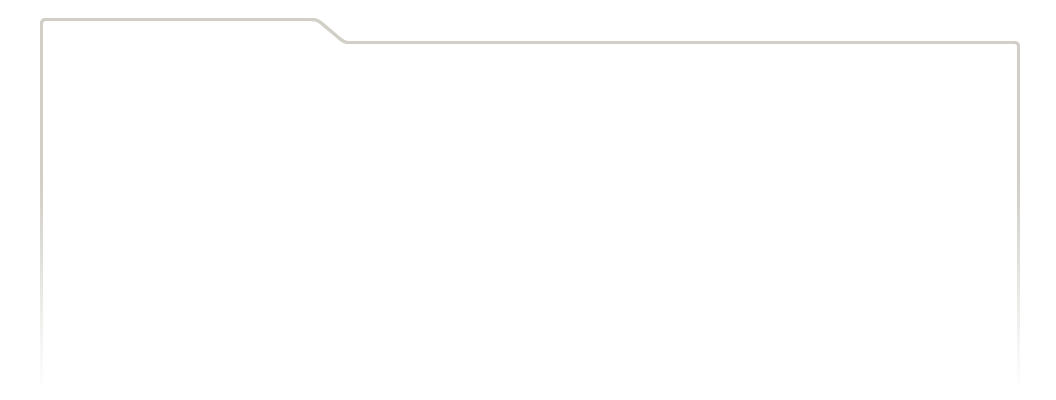
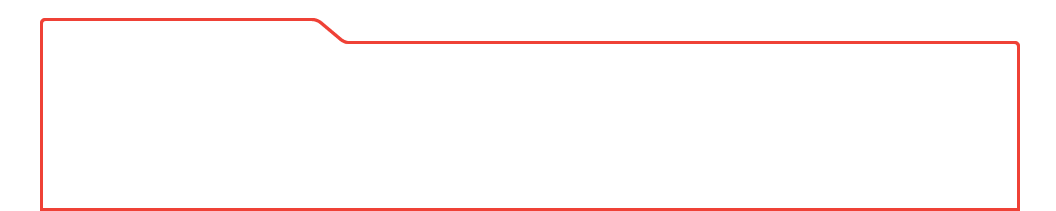
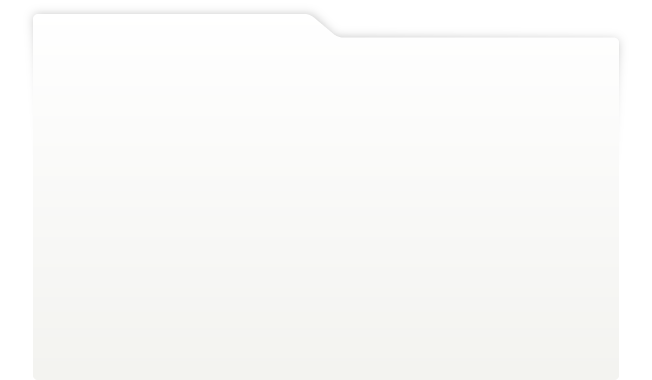
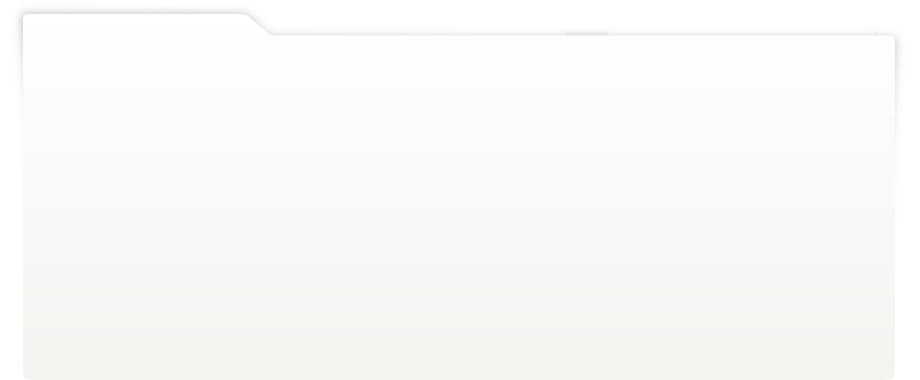
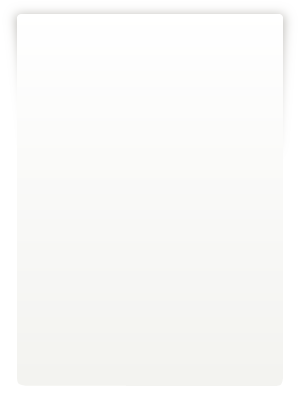
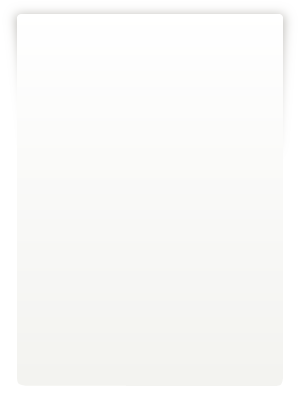
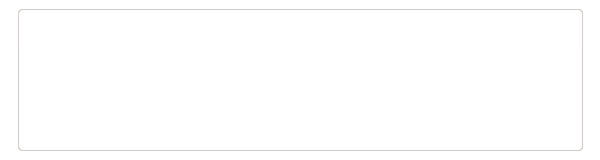
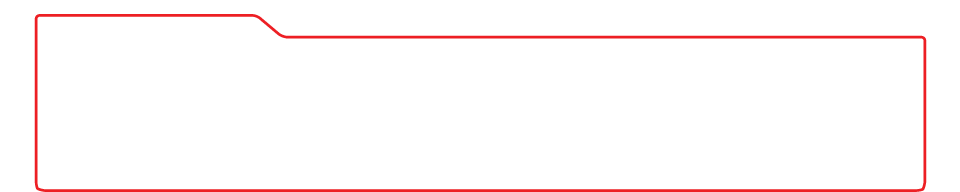
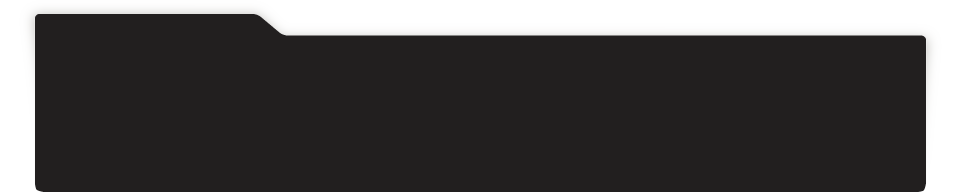
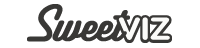
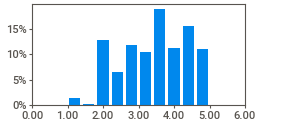
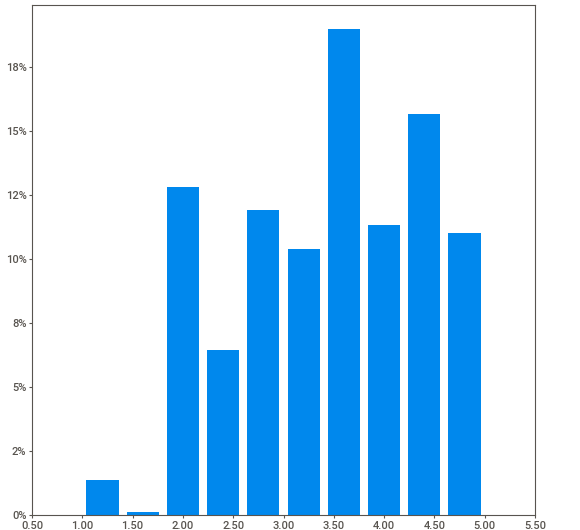
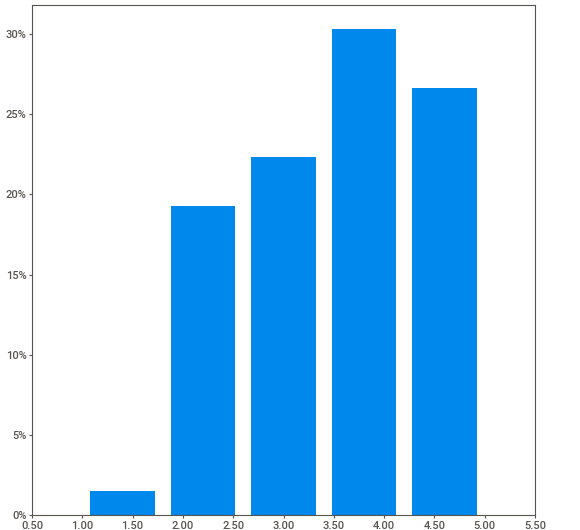
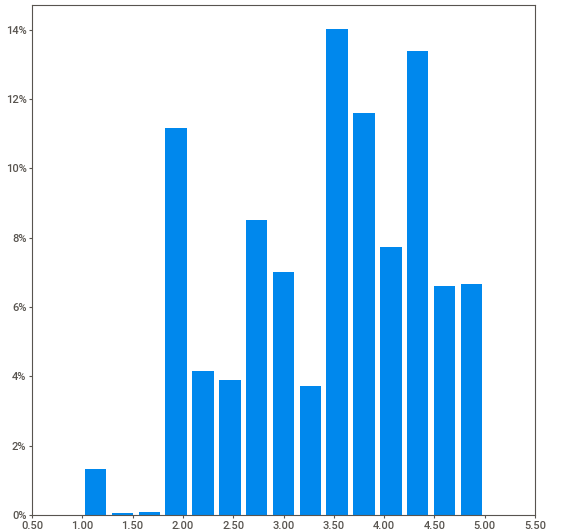
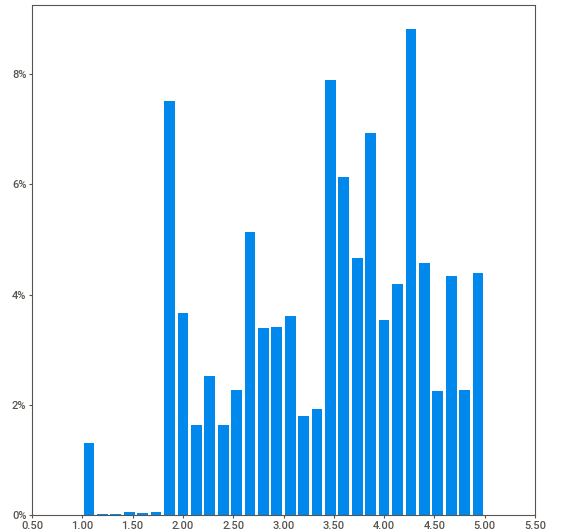
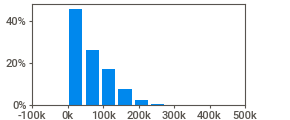
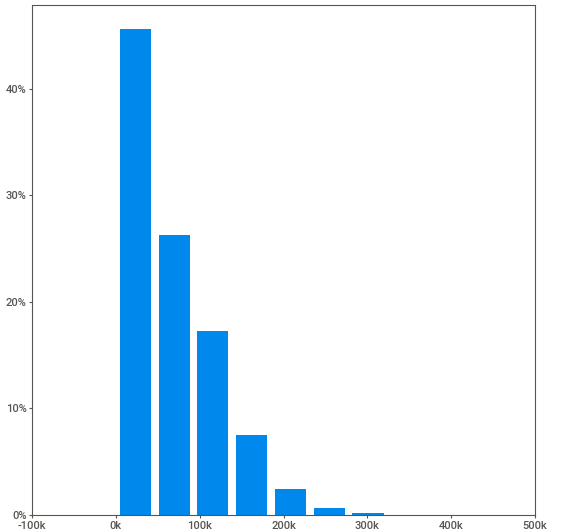
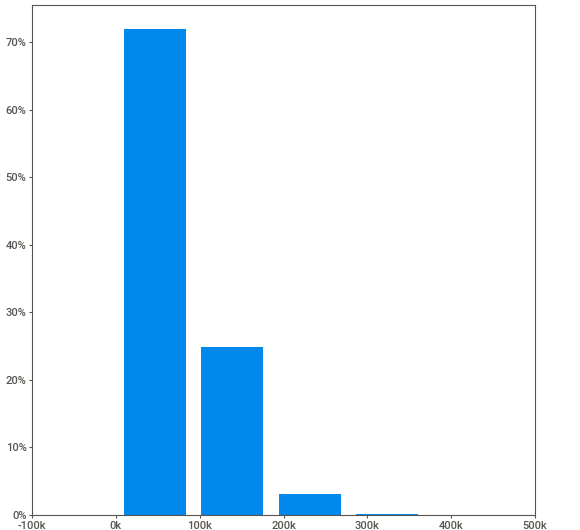
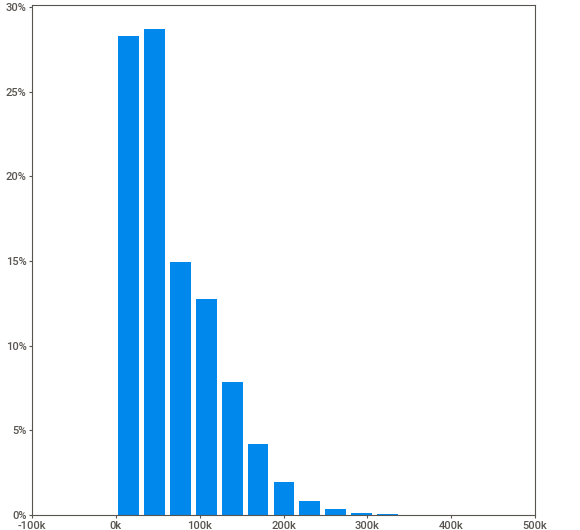
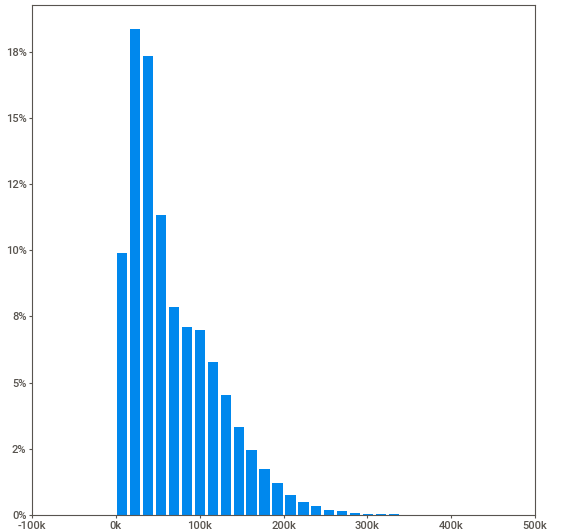
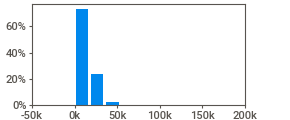
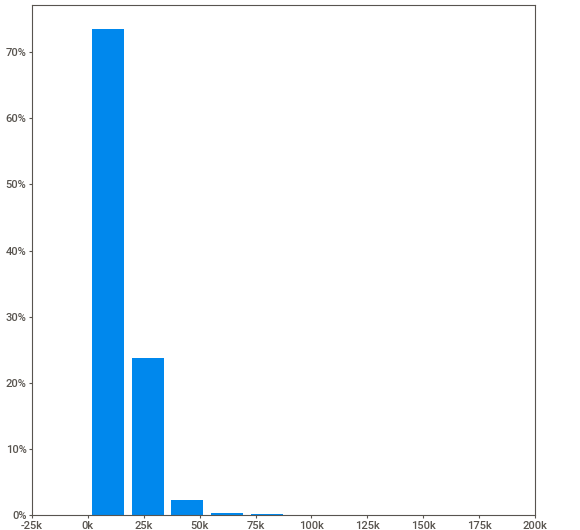
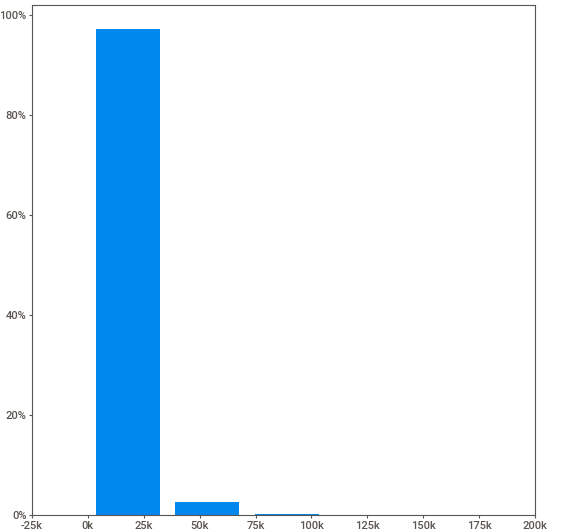
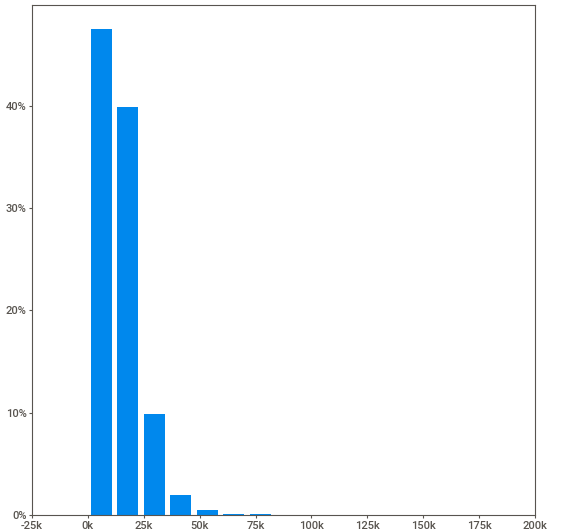
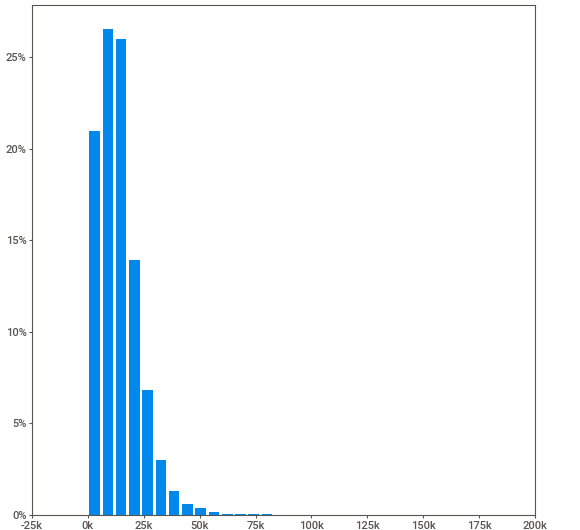
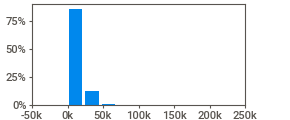
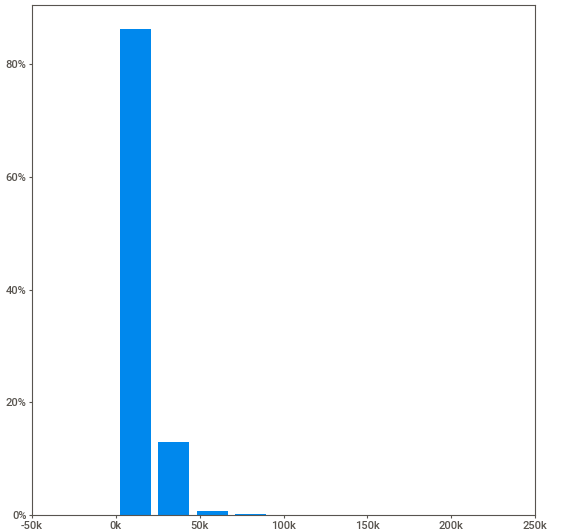
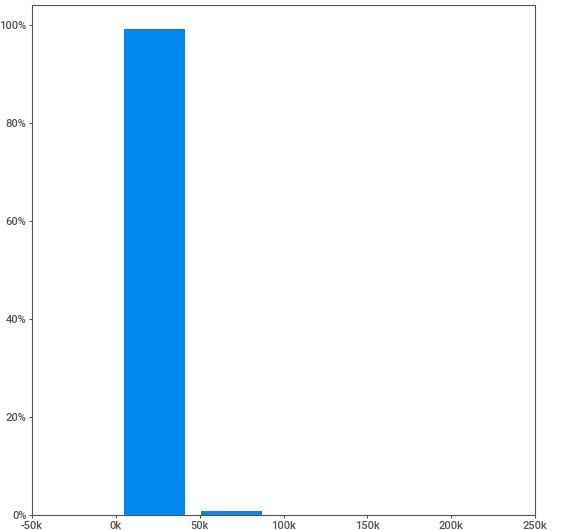
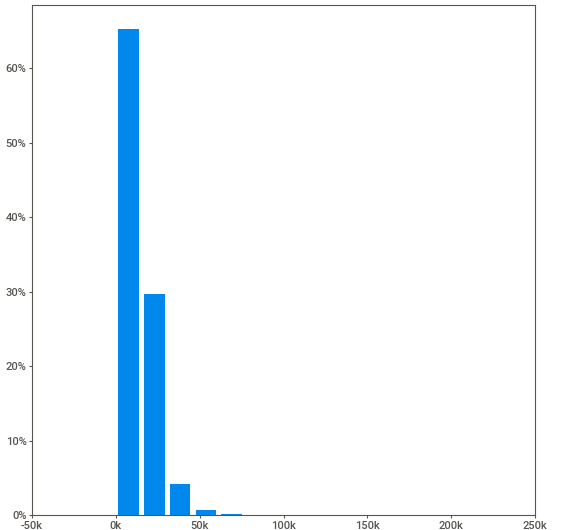
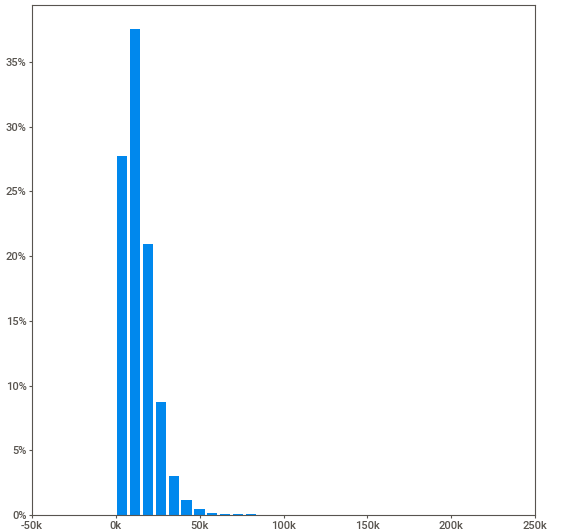
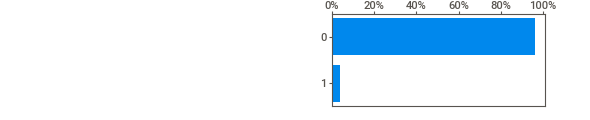
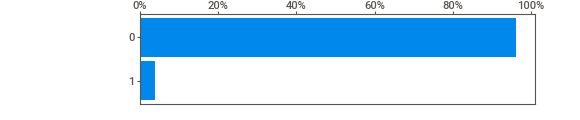
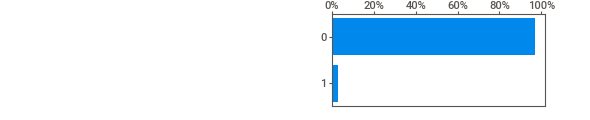
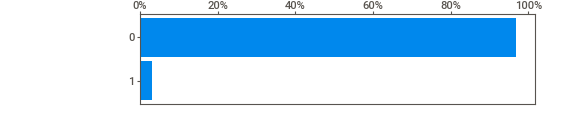
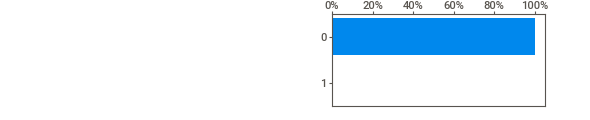
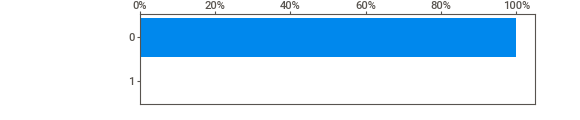
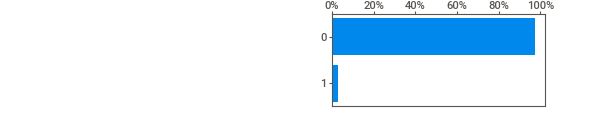
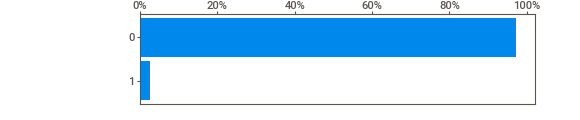
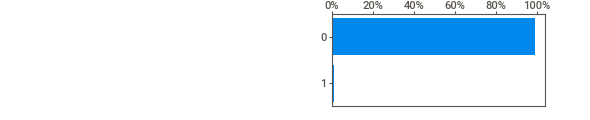
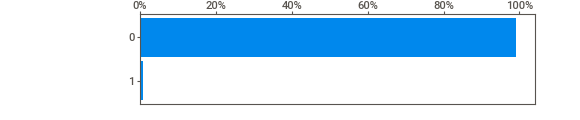
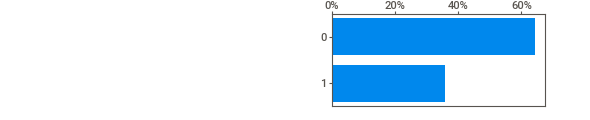
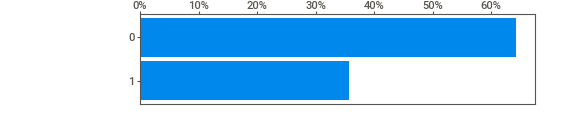
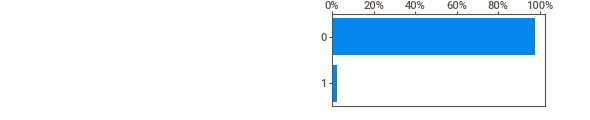
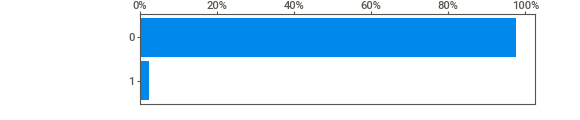
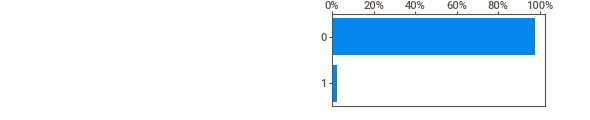
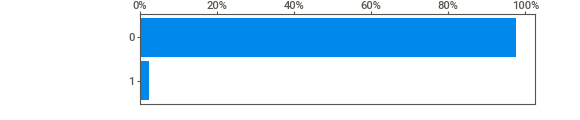
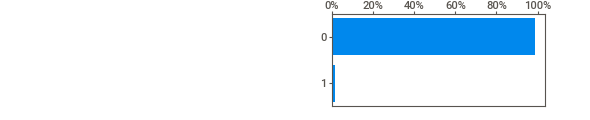
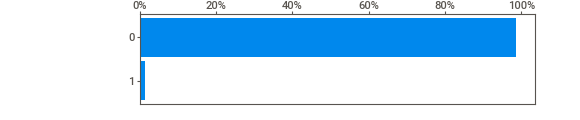
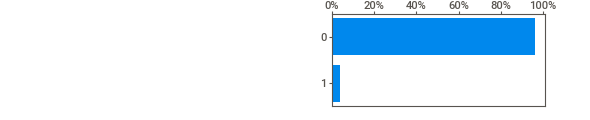
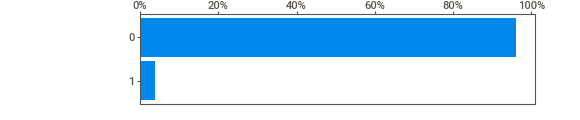
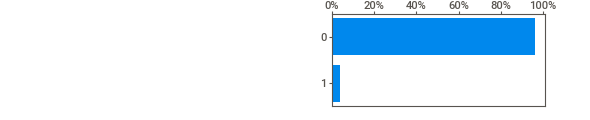
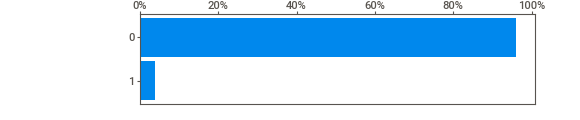
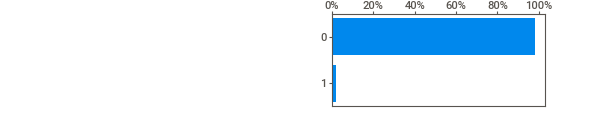
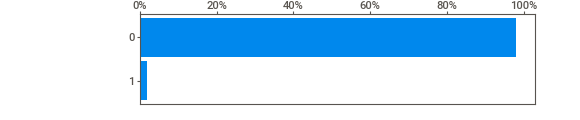
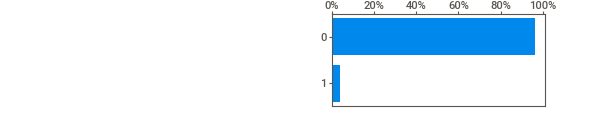
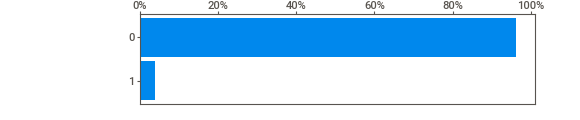
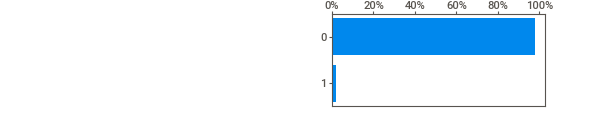
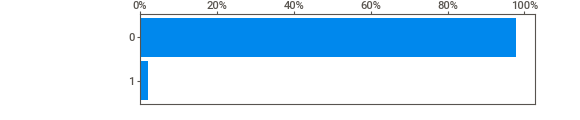
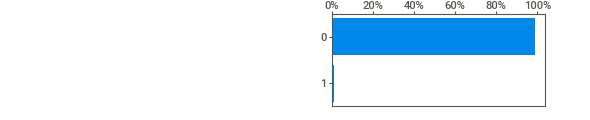
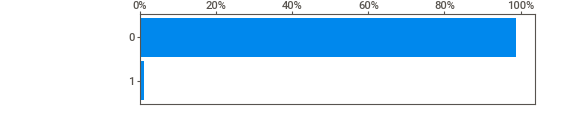
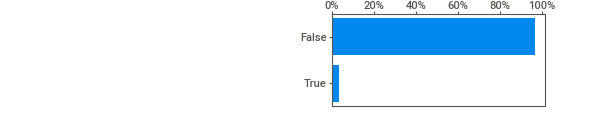
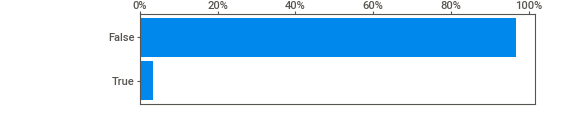
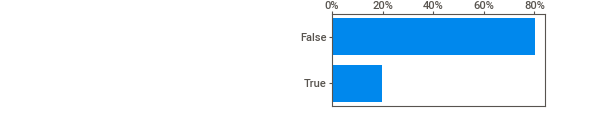
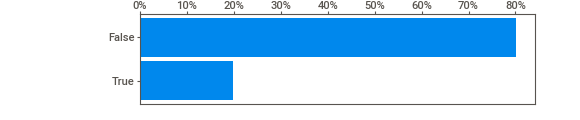
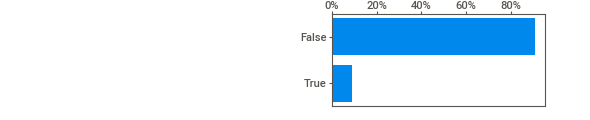
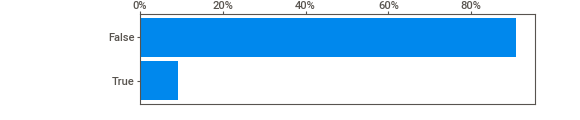
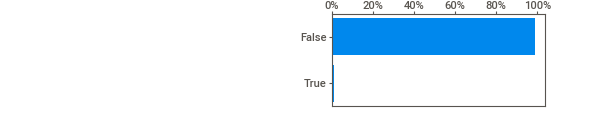
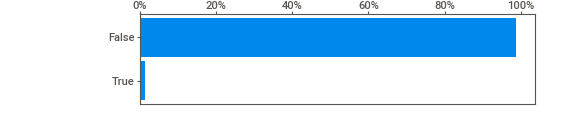
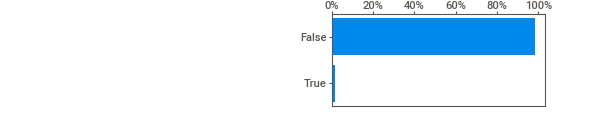
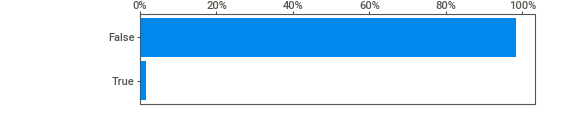
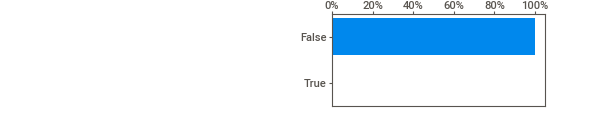
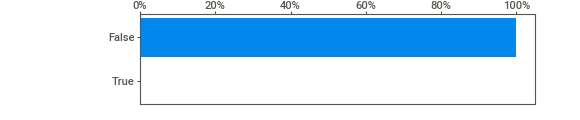
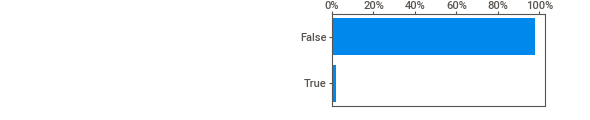
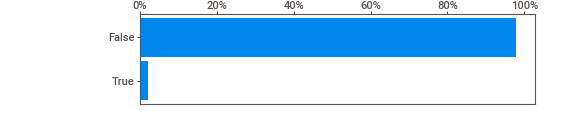
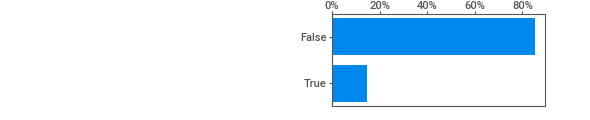
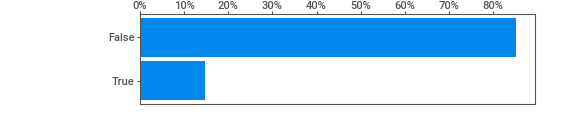
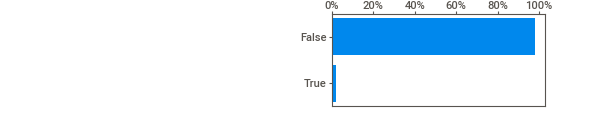
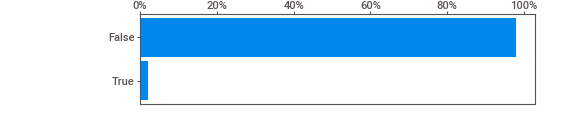
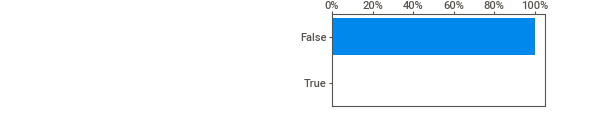
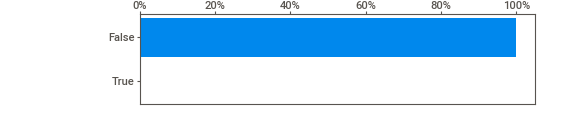
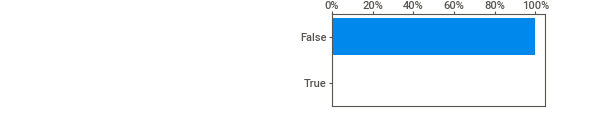
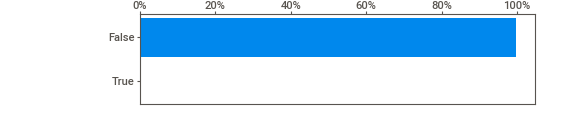
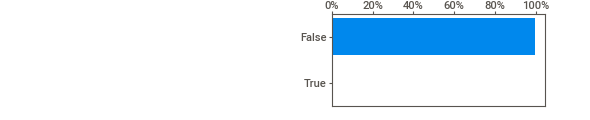
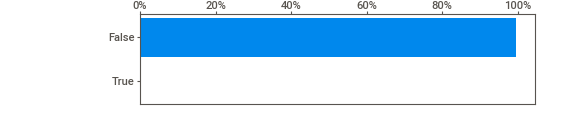
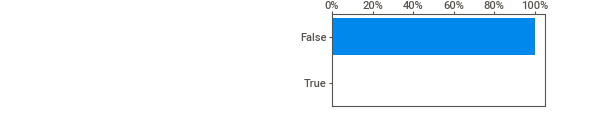
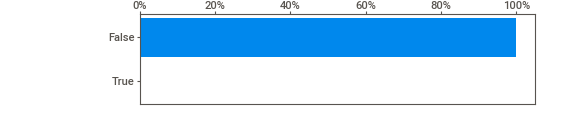
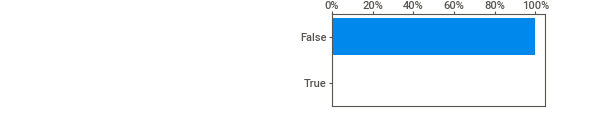
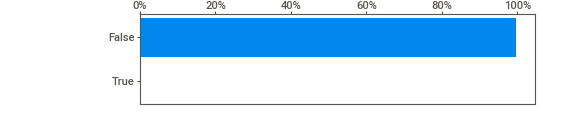
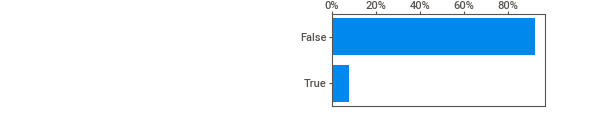
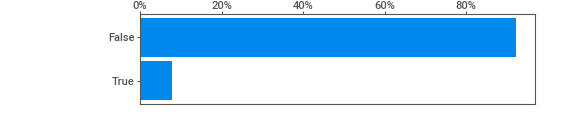
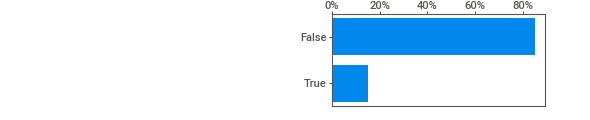
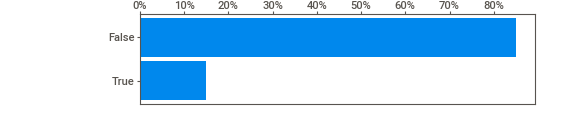
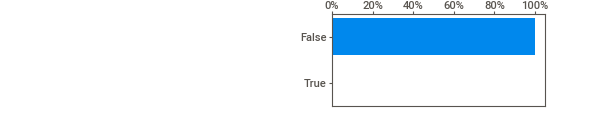
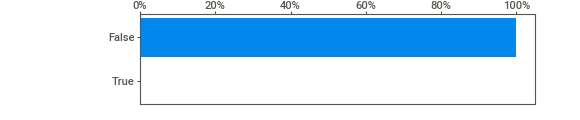
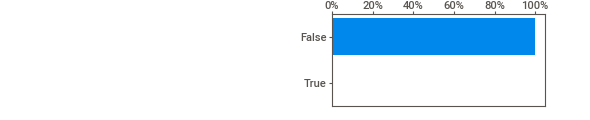
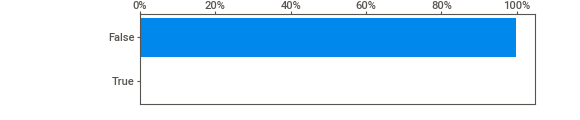
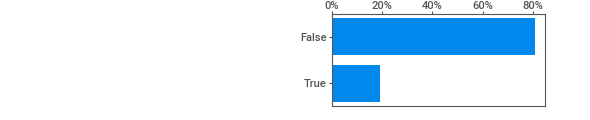
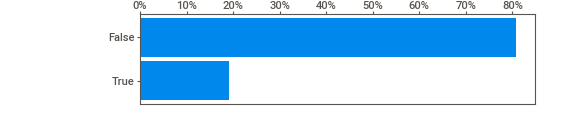
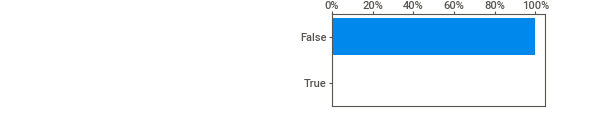
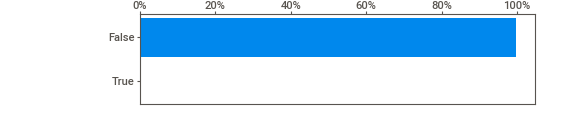
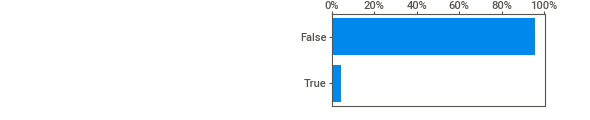
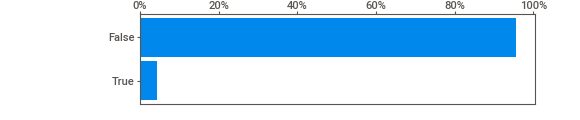
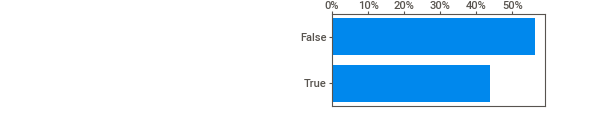
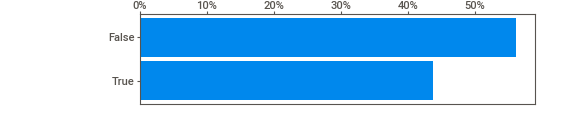
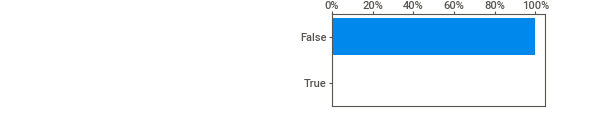
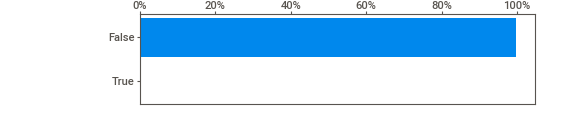
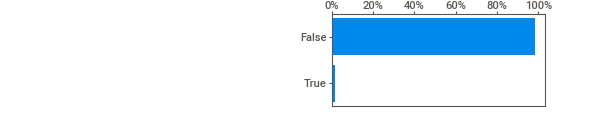
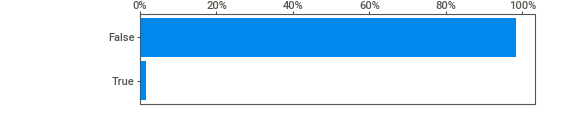
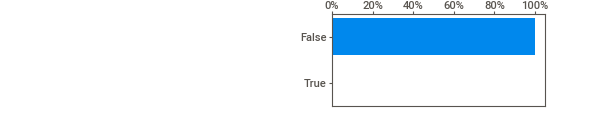
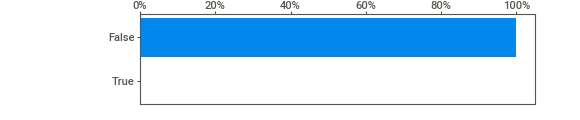
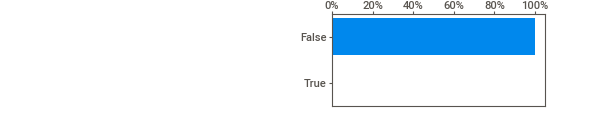
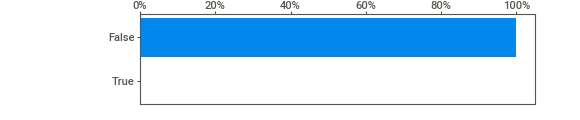
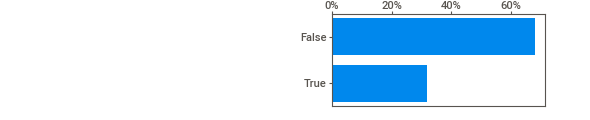
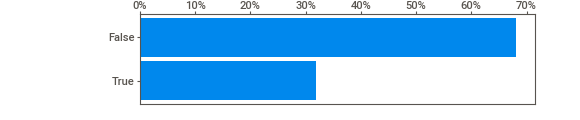
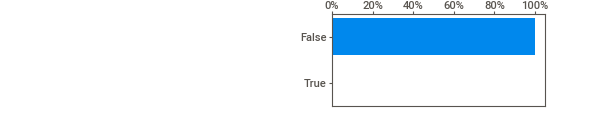
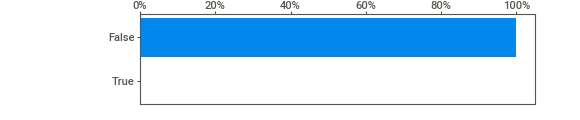
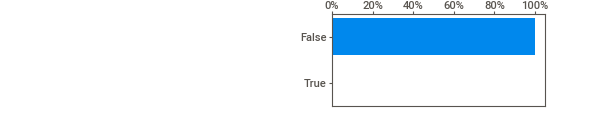
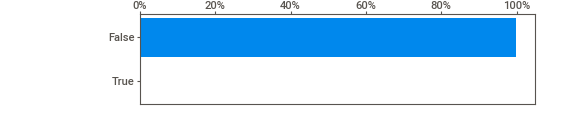
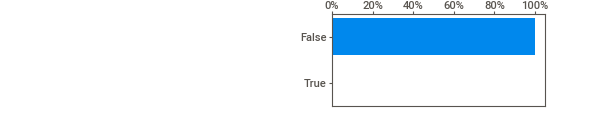
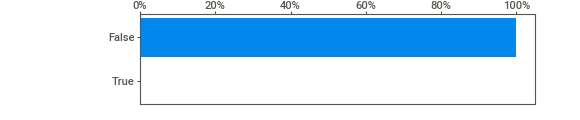
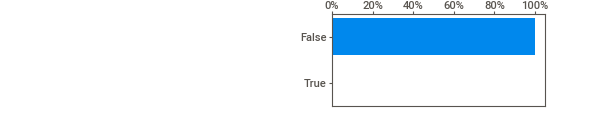
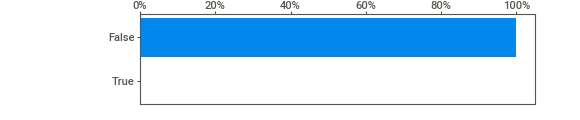
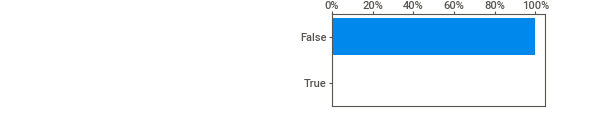
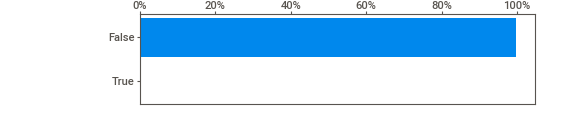
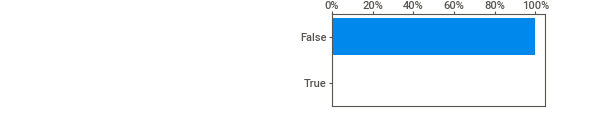
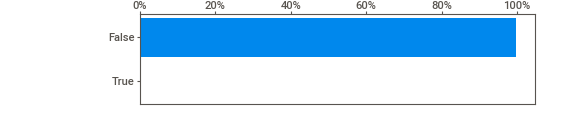
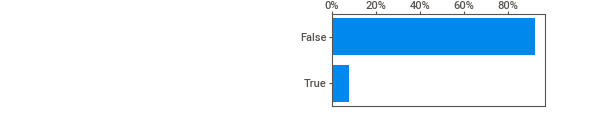
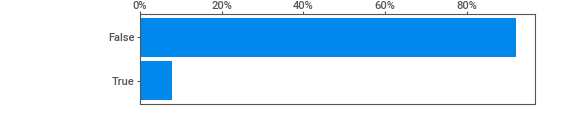
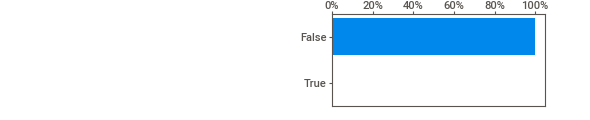
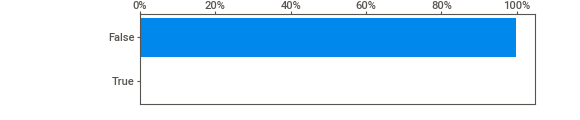
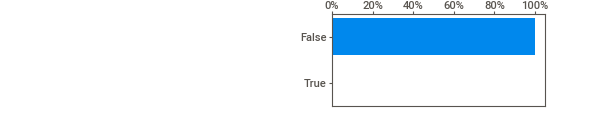
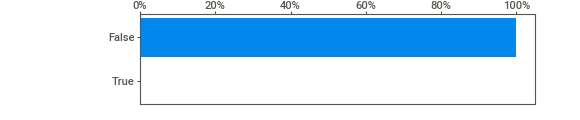
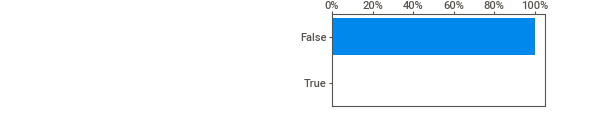
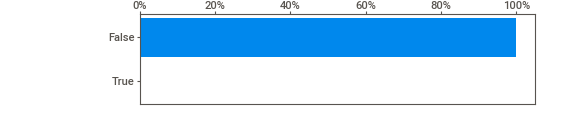
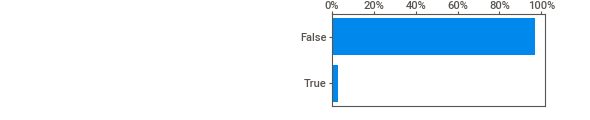
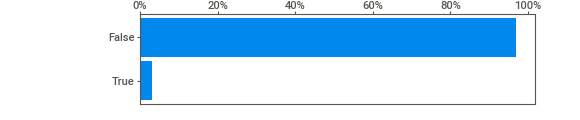
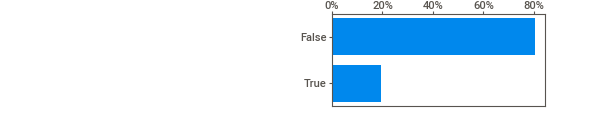
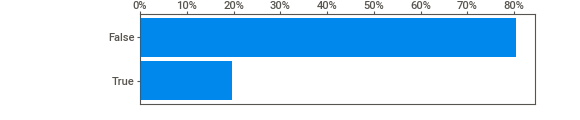
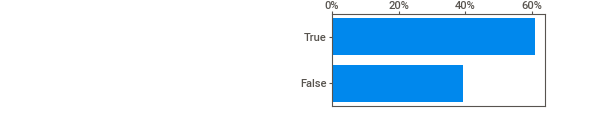
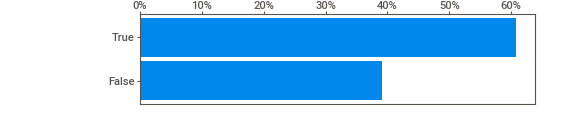
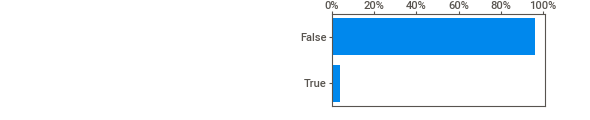
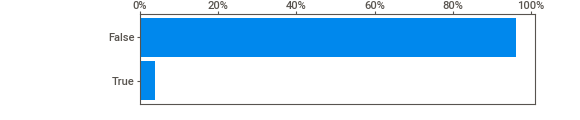
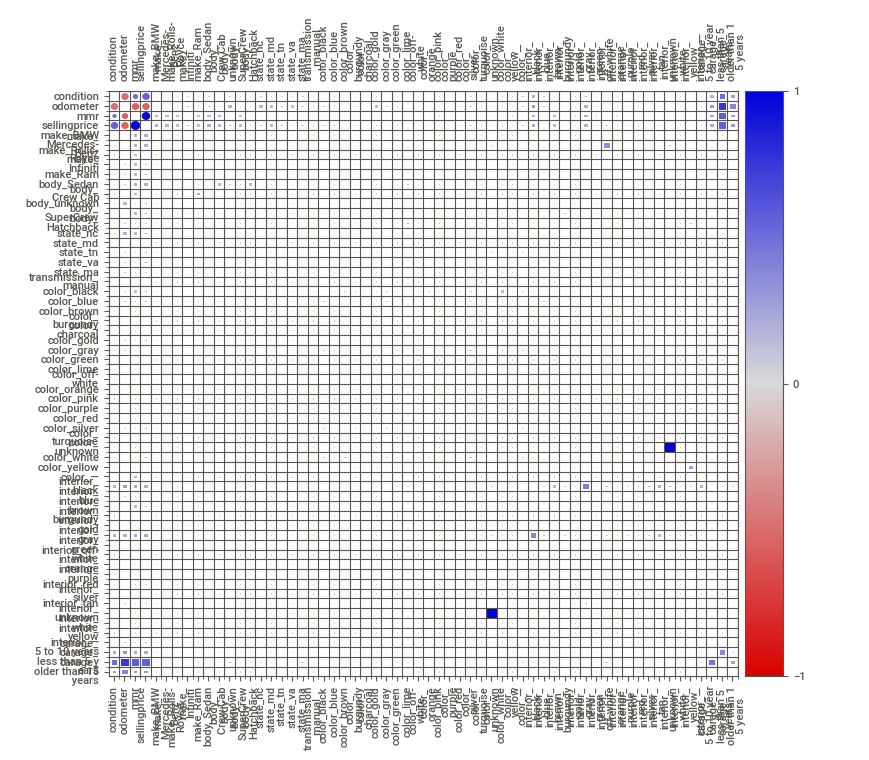
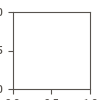

In [ ]:
import sweetviz as sv
report = sv.analyze(df)
## report.show_html() ## this creates an HTML file that you can download
report.show_notebook() ## this shows the report on the notebook

In [ ]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<div style="color:white;display:fill;
            background-color:#3bb2d6;font-size:200%;">
    <p style="padding: 4px;color:white;"><b>In-Class Practice</b></p>
</div>

1.   Using a seed (`random_state = 13`) split the data into `X_train, X_test, y_train, y_test`. Import the function from sklearn: `from sklearn.model_selection import train_test_split`. Use 90\% training and 10\% test.


2.   Run a regresion model. Import the regresion algorithm using: `from sklearn.linear_model import LinearRegression` then fit using `.fit(X_train, y_train)`

3.   Using that model, calculate the predicted values for the training and the validation data sets. Use the `.predict()` method where the argument is the X matrix you want to predict. Name the predictions `yhat_train` and `yhat_test`.

4.   Concatenate the predicted values and the true values to both of the training and validation X data sets.

5.    Write each file out using a `.csv` format and we will do some calculations in Excel for fun.

6.    Using Excel, calculate the RMSE for the training and Test data.

7.   Compare those numbers to the sklearn values.